# Computing eigenvalues

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

## Power Iteration

Suppose a matrix $A$ has a dominant eigenvalue $\lambda_1$, meaning that $\lambda_1$ has multiplicity 1 and $| \lambda_1 | > | \lambda |$ for all other eignvalues $\lambda$. Choose a random starting vector $\boldsymbol{x}_0$ and compute the (normalized) power iteration algorithm:

$$
\boldsymbol{x}_{k+1} = \frac{A \boldsymbol{x}_k}{\| A \boldsymbol{x}_k \|_{\infty}}
$$

The result (usually) converges to an eigenvector for $\lambda_1$, and the value $\lambda_1$ can then be computed via the Rayleigh quotient 

$$
\lambda_1 \approx \frac{\boldsymbol{x}^T A \boldsymbol{x}}{\boldsymbol{x}^T \boldsymbol{x}}.
$$

The function below computes a given number of iterations in the power method. 

In [2]:
def powerMethod(A, x0, iterations, showSteps=False):
    xk = x0
    for k in range(0,iterations):
        if (showSteps):
            print('k={0}\n{1}\n'.format(k,xk))
        xk = A@xk
        xk = xk/np.max(np.abs(xk))
    return xk

Let us test the algorithm on a $3\times 3$ matrix. For this example, we will use

$$
A = \begin{pmatrix} 1 & 1 & 0 \\ 2 & 1 & -1 \\ 0 & -1 & 1 \end{pmatrix}. 
$$

The starting vector $\boldsymbol{x}_0$ can be chosen arbitrarily. 

In [3]:
A = np.array([[1,1,0],[2,1,-1],[0,-1,1]])
x0 = np.array([[1],[0],[2.00001]])

In [4]:
xk = powerMethod(A, x0, 5, True)
print(xk)

k=0
[[1.     ]
 [0.     ]
 [2.00001]]

k=1
[[ 0.4999975]
 [-0.000005 ]
 [ 1.       ]]

k=2
[[ 0.49999]
 [-0.00001]
 [ 1.     ]]

k=3
[[ 0.499975]
 [-0.00003 ]
 [ 1.      ]]

k=4
[[ 0.49993]
 [-0.00008]
 [ 1.     ]]

[[ 0.49981002]
 [-0.00021997]
 [ 1.        ]]


We can see that already after a few steps, the change is quite small for each iteration. Let's do a larger number of iterations.

In [5]:
xk = powerMethod(A, x0, 50)
print(xk)

[[-0.57735027]
 [-1.        ]
 [ 0.57735027]]


Compute the Rayleigh quotient to approximate the corresponding eigenvalue:

In [6]:
xk.T @ A @ xk / (xk.T @ xk)

array([[2.73205081]])

Since $A$ here is a $3\times 3$ matrix, we are also able to find the exact eigenvalues and corresponding eigenvectors. We get that

$$
\lambda_1 = 1 + \sqrt{3} \;\approx 2.73205, \qquad \lambda_2 = 1, \qquad \lambda_3 = 1 - \sqrt{3} \;\approx -0.73205
$$
$$
\boldsymbol{v}_1 = \begin{pmatrix} 1 \\ \sqrt{3} \\ -1 \end{pmatrix}, \qquad 
\boldsymbol{v}_2 = \begin{pmatrix} 1 \\ 0 \\ 2 \end{pmatrix}, \qquad 
\boldsymbol{v}_3 = \begin{pmatrix} -1 \\ \sqrt{3} \\ 1 \end{pmatrix}.
$$ 
In particular, we can see that $\lambda_1$ and $\boldsymbol{v}_1$ agree with what we got numerically using the power method. 

## Inverse Iteration

Suppose the matrix $A$ is invertible (which it is in this case). Then the smallest eigenvalue $\lambda_n$ (in absolute value) of $A$ corresponds to the dominant eigenvalue $1/\lambda_n$ of $A^{-1}$. Choose a random starting vector $\boldsymbol{x}_0$ and compute the (normalized) inverse iteration algorithm:

$$
A \boldsymbol{y}_{k+1} = \boldsymbol{x}_k, \qquad
\boldsymbol{x}_{k+1} = \frac{ \boldsymbol{y}_{k+1} }{ \| \boldsymbol{y}_{k+1} \|_{\infty}}
$$

The result (usually) converges to an eigenvector of $A$ for $\lambda_n$ (which is also an eigenvector of $A^{-1}$ for $1/\lambda_n$). 

In [7]:
def invIteration(A, x0, iterations, showSteps=False):
    xk = x0
    LU,P = la.lu_factor(A)
    for k in range(0,iterations):
        if (showSteps):
            print('k={0}\n{1}\n'.format(k,xk))
        xk = la.lu_solve((LU,P),xk)
        xk = xk/np.max(np.abs(xk))
    return xk

In [14]:
xk = invIteration(A, x0, 100, False)
print(xk)

[[-0.57735026]
 [ 1.        ]
 [ 0.57735029]]


## QR Iteration

This is an algorithm for computing all eigenvalues of a matrix. Start with the matrix $A_0 = A$. For each step $k$, find the QR decomposition $A_k = Q_k R_k$, and then compute $A_{k+1} = R_k Q_k$ and repeat. The matrices $A_k$ are similar and therefore they have the same eigenvalues. The result is an upper (block) triangular matrix with eigenvalues on the diagonal.

In [15]:
def QRMethod(A, iterations, showSteps=False):
    Ak = A
    for k in range(0,iterations):
        if (showSteps):
            print('A{0}\n{1}\n'.format(k,Ak))
        Q,R = la.qr(Ak)
        Ak = R @ Q
    return Ak

In [16]:
print( QRMethod(A, 3, showSteps=True) )

A0
[[ 1  1  0]
 [ 2  1 -1]
 [ 0 -1  1]]

A1
[[ 2.2        -1.38804419 -0.91287093]
 [-0.9797959   0.46666667 -0.74535599]
 [ 0.         -0.74535599  0.33333333]]

A2
[[ 2.79310345 -0.58600402 -0.24913644]
 [ 0.30842317  0.00689655 -0.70564229]
 [ 0.         -1.07703296  0.2       ]]

[[ 2.72925764  0.2659106   0.9061212 ]
 [ 0.11846865  0.31422062 -1.05443664]
 [ 0.         -0.65794548 -0.04347826]]


Increase the number of iterations:

In [17]:
print( QRMethod(A, 75) )

[[ 2.73205081 -0.35355339  0.82158384]
 [ 0.          1.         -0.4472136 ]
 [ 0.         -0.         -0.73205081]]


We can see the eigenvalues of $A$ on the diagonal of the matrix $A_k$.




## PageRank example

One situation where we can apply the power method is when finding the PageRank vector of a given directed graph. This method has (at least previously) been used by Google to rank webpages that match a search query in order to provide the most relevant results. In this example, let's consider the graph below. 

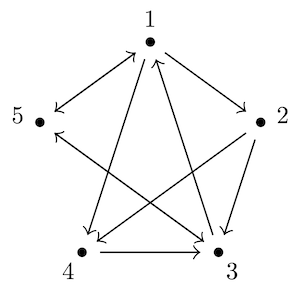

The corresponding transition matrix $P$ (a stochastic matrix) is given by

$$
P = \begin{pmatrix} 
0   & 0   & 1/2 & 0 & 1/2 \\ 
1/3 & 0   & 0   & 0 & 0   \\ 
0   & 1/2 & 0   & 1 & 1/2 \\ 
1/3 & 1/2 & 0   & 0 & 0   \\ 
1/3 & 0   & 1/2 & 0 & 0 
\end{pmatrix}
$$

where each entry $p_{i,j}$ denotes the probability of moving from vertex $j$ to vertex $i$ when selecting edges uniformly at random. In order to ensure that the power method will converge, we need to add a small modification. At each step, with probability $\alpha$ we follow a link selected uniformly at random, while with probability $1-\alpha$ we immediately jump to a randomly selected webpage. We get the Google matrix $$\alpha P + (1-\alpha)\boldsymbol{v}\boldsymbol{e}^T,$$ where $\alpha\in(0,1)$ is the teleportation factor, $\boldsymbol{v}$ is the distribution of selecting a random page to jump to, and $\boldsymbol{e}$ is a vector with all entries 1. Commonly $\boldsymbol{v}$ is taken to be the uniform distribution over all vertices, in which case $\boldsymbol{v}\boldsymbol{e}^T$ is the $N\times N$ matrix with every entry equal to $1/N$. 

In [12]:
P = np.array([[0,0,1/2,0,1/2],[1/3,0,0,0,0],[0,1/2,0,1,1/2],[1/3,1/2,0,0,0],[1/3,0,1/2,0,0]])
ee = np.ones(5)
vv = ee/5
alpha = 0.85
GM = alpha * P + (1-alpha) * np.outer(vv,ee)
print(GM)

[[0.03       0.03       0.455      0.03       0.455     ]
 [0.31333333 0.03       0.03       0.03       0.03      ]
 [0.03       0.455      0.03       0.88       0.455     ]
 [0.31333333 0.455      0.03       0.03       0.03      ]
 [0.31333333 0.03       0.455      0.03       0.03      ]]


Any Google matrix has the dominant eigenvalue 1, and there is a unique stochastic vector $\boldsymbol{x}$ which is a corresponding eigenvector. This is the PageRank vector, and each entry can be taken as a measure of the relative importance of a particular webpage, since that value represents the long term probability of visiting the page after a large number of steps in the "random surfing" process. 

In [13]:
xpr = powerMethod(GM, vv, 50)
print(xpr/np.sum(xpr))

[0.24698816 0.09997998 0.2881266  0.14247147 0.22243378]


In this example, we can see that webpage 3 gets the highest PageRank weight, which seems reasonable given that it is the only page with links from at least three other pages. Webpages 1 and 5 are not very far behind, and this can partly be explained by the fact that they are the pages that receive links from the most important one (webpage 3). On the other hand, webpage 2 has a clearly lower number than the rest, being linked to only from a single other page. 

### A few comments

In case there is a vertex without any outgoing edges (i.e. a webpage without any links at all), then the corresponding column in $P$ is replaced by $\boldsymbol{v}$ before forming the Google matrix. This will ensure that the Google matrix is stochastic, i.e. in every column the entries add up to 1. 

On the role of the factor $\alpha$:
- If $\alpha$ is small (close to 0), then for the most part we have completely random jumps, and so the webpage structure described in $P$ is "lost". This is clearly not good for ranking the webpages, so ideally we want a large $\alpha$. 
- On the other hand if $\alpha$ is too large (close to 1), the convergence gets very slow. Remember that if $\alpha$ would equal 1 we might not get convergence at all.
- The Google matrix is usually huge, with thousands or millions of webpages to be ranked, so even though the adjacency matrix is sparse (lots of zeros) we still don't want to do too many iterations. The value $\alpha=0.85$ is frequently used, so probably it is considered some sort of optimal balance between structure and speed. 

To have a high value in the PageRank vector, it is helpful to receive links from a lot of other webpages, and/or to receive links from webpages that themselves have a very high PageRank value. This has led to some problems in the form of large websites with a high reputation selling links to other sites that are trying to boost their PageRank score. As this  does not necessarily make the other webpages any more relevant for the Google search queries, such a business is harmful for the efficiency of PageRank to produce good results. Google has tried to combat this manipulation by penalizing sites (e.g. lower their score) and updating their algorithms many times over the years. Today the actual method that Google uses is probably much different and more advanced than what is described briefly here. 